## 주성분분석(PCA, Principal Component Analysis) : 차원축소 모델

In [ ]:
# - 주성분(주요 구성요소, 특성)분석, PCA라고도 부릅니다.
# - 대표적인 차원축소 모델
# - 지도/비지도 모두 사용가능합니다.
# - 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 될 가능성은 커짐
#   이때, 차원축소를 이용하면 성능을 유지하면서, 속도를 높일 수 있음

### <차원축소>
# - 데이터를 가장 잘 나타내는 일부 특성을 선택
# - 데이터 크기(특성)를 줄이면서 학습모델의 성능을 향상시키는 방법
# - 축소된 차원을 다시 원본 차원으로 손실을 최소화하면서 복원이 가능함

### <장점>
# - 대량의 데이터를 이용하여 모델 훈련 시에
# - 시간이 오래 걸리는 경우 적용해 볼 수 있음
# - 훈련시간 개선 및 성능 유지 또는 향상 가능

## 

In [1]:
import pandas as pd
import numpy as np

In [8]:
file_path = './data/09_fruits_300.npy'
fruits = np.load(file_path)
print(fruits.shape)
# 첫번째 축 : 300개 행
# 두번째 축 : 열이 100개
# 세번째 축 : 깊이 100개 (실제 데이터가 들어있는 곳)

## 300행에 10000열로 변환
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

## 데이터프레임으로
df = pd.DataFrame(fruits_2d)
df

(300, 100, 100)
(300, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
298,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA

In [9]:
from sklearn.decomposition import PCA

In [11]:
# 클래스(모델) 생성하기
# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정해 주어야 합니다.
pca = PCA(n_components = 50)

# 훈련모델 생성하기
pca.fit(fruits_2d)

PCA(n_components=50)

In [13]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [14]:
### 3개 클러스터를 각각 테스트하기 위하여 이미지 출력 함수 생성
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols,
                           figsize = (cols * ratio, rows * ratio),
                            squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    
    plt.show()

In [16]:
import matplotlib.pyplot as plt

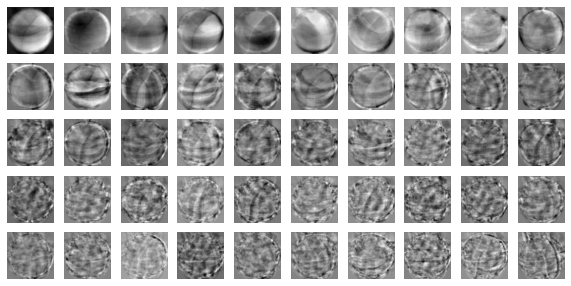

In [17]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [19]:
print(fruits_2d.shape)

(300, 10000)


## 차원 축소하기

In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [21]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [23]:
# 2d -> 3d로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


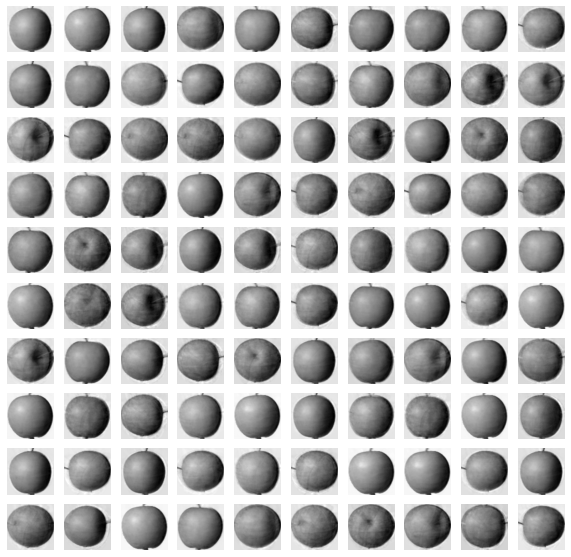

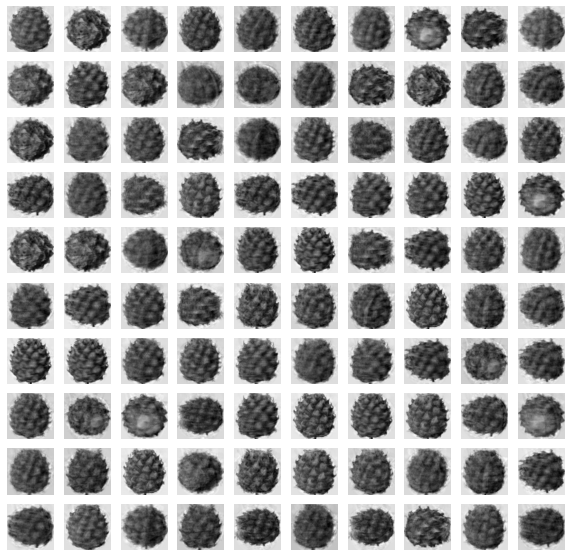

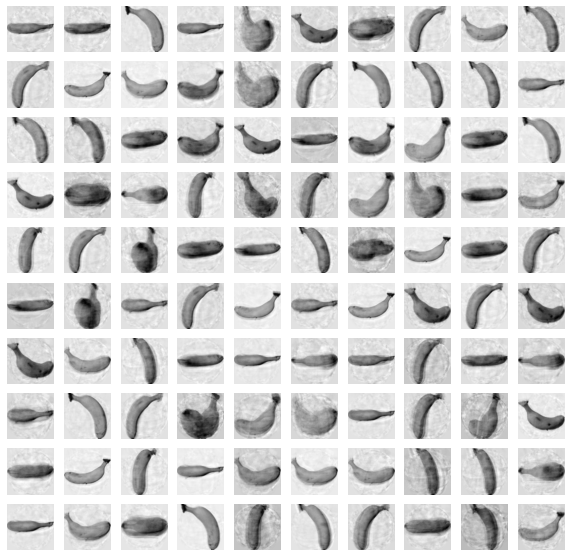

In [24]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print('\n')

## KMeans 모델에 차원축소 데이터 적용하기

In [30]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [31]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


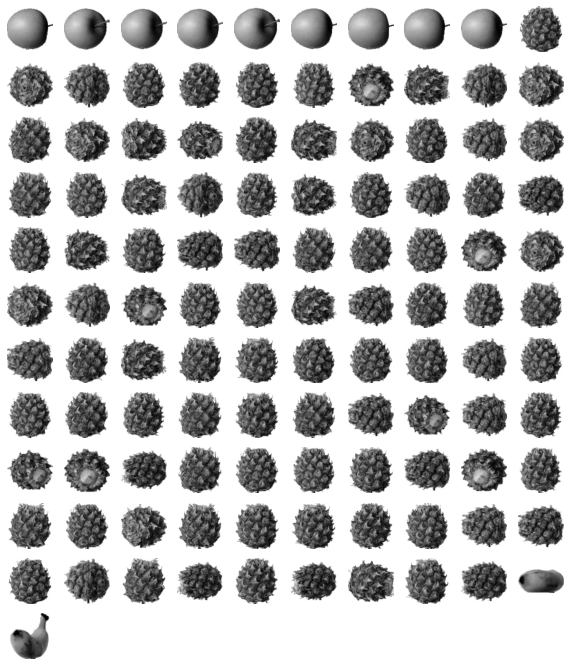

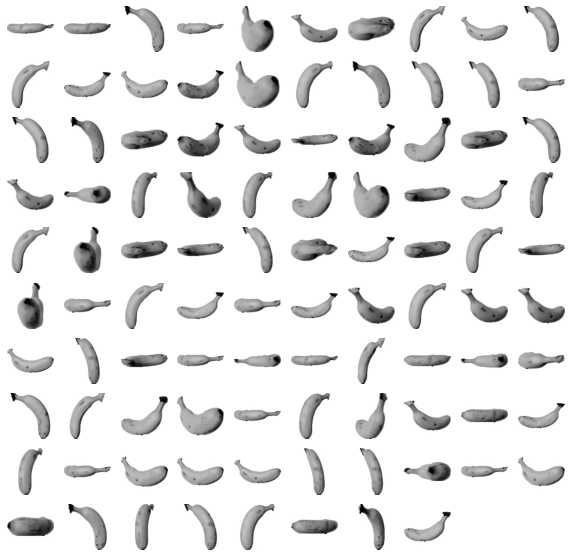

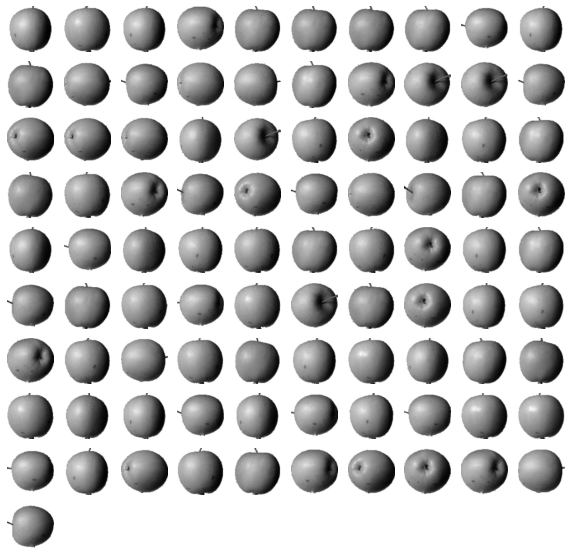

In [34]:
for label in  range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

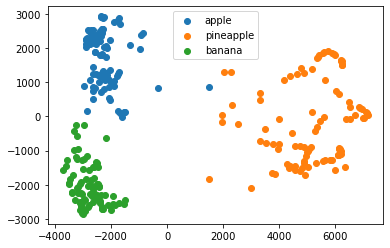

In [35]:
## 클러스터 구성 확인 --> 산점도로 시각화하여 확인
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
    
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

## 로지스틱 회귀모델 적용해 보기

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [40]:
### 종속변수(target) 생성하기
# 지도학습을 사용하는 경우 target 변수가 필요합니다.
fruits_target = np.array([0] * 100 + [1] * 100 + [2] * 100)
fruits_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
### 교차검증으로 성능 최대화
from sklearn.model_selection import cross_validate

In [47]:
scores = cross_validate(lr, fruits_2d, fruits_target,
                       return_train_score = True)
scores

{'fit_time': array([0.54950762, 0.35390115, 0.38557696, 0.35310197, 0.36385775]),
 'score_time': array([0.        , 0.00805044, 0.00199604, 0.00806642, 0.        ]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [51]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())
print(scores['fit_time'].mean())

1.0
0.9966666666666667
0.40118908882141113


In [52]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [53]:
print(pca.n_components_)

2


In [54]:
### 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [55]:
scores = cross_validate(lr, fruits_pca, fruits_target,
                       return_train_score = True)
scores

C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\DEV\Tools\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

{'fit_time': array([0.03476167, 0.01792979, 0.01524782, 0.01954436, 0.0187571 ]),
 'score_time': array([0.00103045, 0.00098729, 0.        , 0.00629401, 0.00245976]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [56]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())
print(scores['fit_time'].mean())

1.0
0.9933333333333334
0.02124814987182617
